# DeepLabCut Toolbox Setup

In [12]:
import deeplabcut

In [13]:
path_config_file = '/DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/Bird Pose-d22cs051-2023-05-12/config.yaml'

## Create a new project

Note: Run this one the first time to create a project

In [3]:
# deeplabcut.create_new_project(
#     'Bird Pose',
#     'd22cs051',
#     ['/DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/videos/vid1.mp4',
#      '/DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/videos/vid2.mp4',
#      '/DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/videos/vid3.mp4'],
#     working_directory='/DATA1/bikash_dutta/DL/Project/DeepCutLab/birds', 
#     copy_videos=True,
#     multianimal=False
#     )

## Now, go edit the config.yaml file that was created! 
Add your body part labels, edit the number of frames to extract per video, etc. 

## Extract frames from videos 

In [15]:
# %matplotlib inline
#there are other ways to grab frames, such as uniformly; please see the paper:

# #AUTOMATIC:
# deeplabcut.extract_frames(
#     path_config_file,
#     mode='mannual',
#     algo='kmeans',
#     crop=False,
#     userfeedback=True,
#     cluster_step=1,
#     cluster_resizewidth=30,
#     cluster_color=False,
#     opencv=True,
#     slider_width=25,
#     config3d=None,
#     extracted_cam=0,
#     videos_list=videos,
# )
# deeplabcut.extract_frames(path_config_file)

In [6]:
# #AND/OR:
# #SELECT RARE EVENTS MANUALLY:
# %gui wx
# deeplabcut.extract_frames(path_config_file,'manual')

## Label the extracted frames

In [16]:
# note run this on ipython with gui to lable your data
# deeplabcut.label_frames(path_config_file)

## Check the labels

In [17]:
deeplabcut.check_labels(path_config_file) #this creates a subdirectory with the frames + your labels

Creating images with labels by d22cs051.


100%|██████████| 20/20 [00:04<00:00,  4.05it/s]

If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


If the labels need adjusted, you can use relauch the labeling GUI to move them around, save, and re-plot!

## Create a training dataset

In [18]:
deeplabcut.create_training_dataset(path_config_file)
#remember, there are several networks you can pick, the default is resnet-50!

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([35, 34, 42, 27, 11,  2, 33, 45, 22, 48,  4, 10, 29, 40, 32, 41, 37,
           7, 14, 31, 28, 56, 52, 18, 54, 26, 15,  5, 30, 16, 49, 20, 50,  8,
          13, 25, 17, 43, 46, 51, 38,  1, 12, 57, 24,  6, 23, 36, 21, 19,  9,
          39, 55,  3,  0]),
   array([53, 47, 44])))]

## Start training:


In [19]:
deeplabcut.train_network(path_config_file)

Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7]],
 'all_joints_names': ['beeak',
                      'head',
                      'body',
                      'right_wing',
                      'left_wing',
                      'tail',
                      'right_leg',
                      'left_leg'],
 'alpha_r': 0.02,
 'apply_prob': 0.5,
 'batch_size': 1,
 'contrast': {'clahe': True,
              'claheratio': 0.1,
              'histeq': True,
              'histeqratio': 0.1},
 'convolution': {'edge': False,
                 'emboss': {'alpha': [0.0, 1.0], 'strength': [0.5, 1.5]},
                 'embossratio': 0.1,
                 'sharpen': False,
                 'sharpenratio': 0.3},
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_Bird '
            'PoseMay12/Bird Pose_d22cs05195shuffle1.mat',
 'dataset_type': 'default',
 'decay_steps': 30000,
 'deterministic': False,
 'display_iters': 1000,
 'fg_fracti

Selecting single-animal trainer
Batch Size is 1


/home/planck/anaconda3/envs/bikash/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2023-05-12 05:36:19.078171: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-05-12 05:36:19.078221: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22086 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


Loading ImageNet-pretrained resnet_50


2023-05-12 05:36:19.418158: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22086 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6
2023-05-12 05:36:20.062212: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2023-05-12 05:36:21.099379: W tensorflow/c/c_api.cc:300] Operation '{name:'pose/locref_pred/block4/biases/Momentum/Assign' id:6191 op device:{requested: '', assigned: ''} def:{{{node pose/locref_pred/block4/biases/Momentum/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](pose/locref_pred/block4/biases/Momentum, pose/locref_pred/block4/biases/Momentum/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after r

Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/Bird Pose-d22cs051-2023-05-12/dlc-models/iteration-0/Bird PoseMay12-trainset95shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'default', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict': False, 'pairwise_predict': False, 'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7]], 'all_joints_names': ['beeak', 'head', 'body', 'right_wing',

2023-05-12 05:36:23.978153: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-05-12 05:36:24.515991: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-12 05:36:24.516388: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-12 05:36:24.516405: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:109] Couldn't get ptxas version : FAILED_PRECONDITION: Couldn't get ptxas/nvlink version string: INTERNAL: Couldn't invoke ptxas --version
2023-05-12 05:36:24.516839: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-12 05:36:24.516882: W tensorflow/compiler/xla/stream_executor/gpu/redzone_allocator.cc:317] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This mes

KeyboardInterrupt: 

## Start evaluating

Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7]],
 'all_joints_names': ['beeak',
                      'head',
                      'body',
                      'right_wing',
                      'left_wing',
                      'tail',
                      'right_leg',
                      'left_leg'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_Bird '
            'PoseMay12/Bird Pose_d22cs05195shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/home/planck/anaconda3/envs/bikash/lib/python3.10/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 1.0,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'mean_pixel': [123.68, 116.779, 103.939],
 'mirror':

Running  DLC_resnet50_Bird PoseMay12shuffle1_50000  with # of training iterations: 50000


2023-05-12 06:31:09.610752: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22086 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


Running evaluation ...


58it [00:03, 18.14it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-50000
Results for 50000  training iterations: 95 1 train error: 2.99 pixels. Test error: 69.53  pixels.
With pcutoff of 0.6  train error: 2.99 pixels. Test error: 25.58 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 58/58 [00:16<00:00,  3.51it/s]

The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
Please check the results, then choose the best model (snapshot) for prediction. You can update the config.yaml file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise, consider adding more labeled-data and retraining the network (see DeepLabCut workflow Fig 2, Nath 2019)


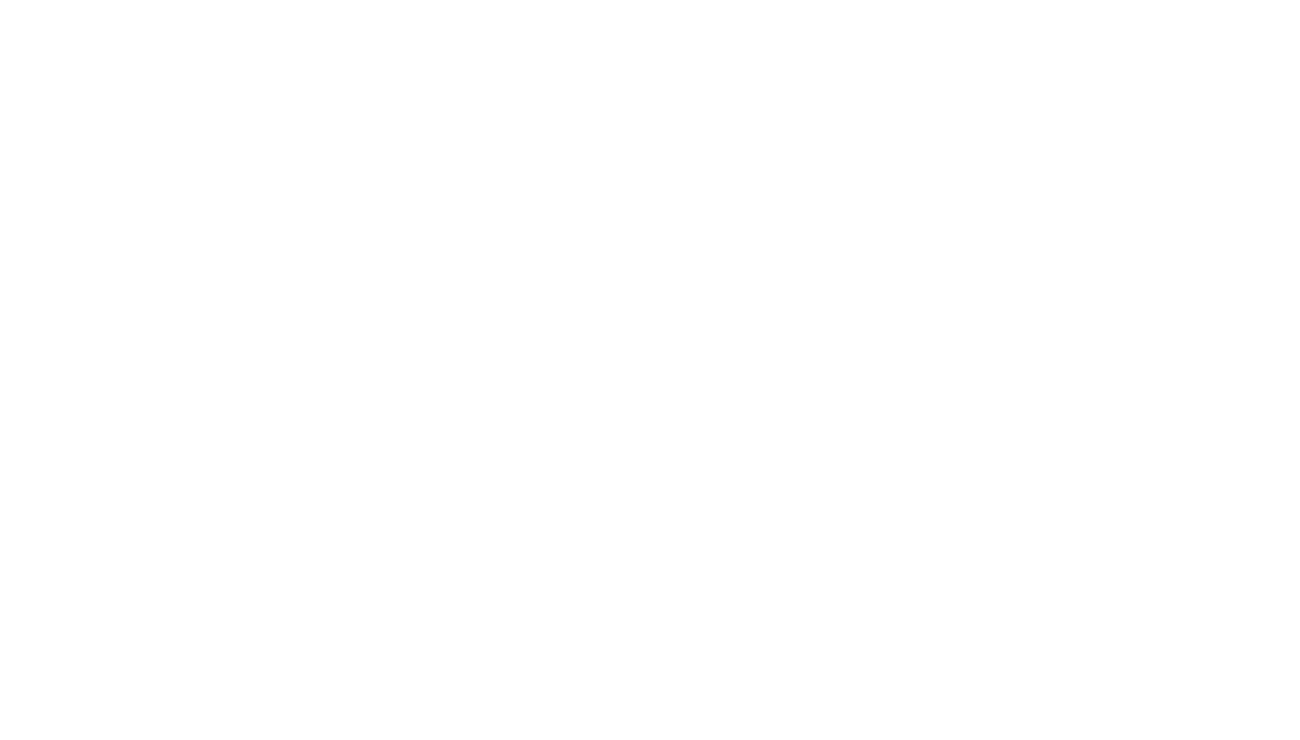

In [20]:
deeplabcut.evaluate_network(path_config_file, plotting=True)

## Start Analyzing videos

In [21]:
videofile_path = ['/DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/Bird Pose-d22cs051-2023-05-12/videos/vid1.mp4',
                  '/DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/Bird Pose-d22cs051-2023-05-12/videos/vid2.mp4',
                  '/DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/Bird Pose-d22cs051-2023-05-12/videos/vid3.mp4',
                  '/DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/Bird Pose-d22cs051-2023-05-12/videos/vid4.mp4'
                  ] #Enter a folder OR a list of videos to analyze.

deeplabcut.analyze_videos(path_config_file,videofile_path, videotype='.mp4')

Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7]],
 'all_joints_names': ['beeak',
                      'head',
                      'body',
                      'right_wing',
                      'left_wing',
                      'tail',
                      'right_leg',
                      'left_leg'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_Bird '
            'PoseMay12/Bird Pose_d22cs05195shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/home/planck/anaconda3/envs/bikash/lib/python3.10/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 1.0,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'mean_pixel': [123.68, 116.779, 103.939],
 'mirror':

Using snapshot-50000 for model /DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/Bird Pose-d22cs051-2023-05-12/dlc-models/iteration-0/Bird PoseMay12-trainset95shuffle1


2023-05-12 06:31:50.258106: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22086 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


Starting to analyze %  /DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/Bird Pose-d22cs051-2023-05-12/videos/vid1.mp4
Loading  /DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/Bird Pose-d22cs051-2023-05-12/videos/vid1.mp4
Duration of video [s]:  10.08 , recorded with  25.0 fps!
Overall # of frames:  252  found with (before cropping) frame dimensions:  1280 720
Starting to extract posture


100%|██████████| 252/252 [00:08<00:00, 30.74it/s]


Saving results in /DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/Bird Pose-d22cs051-2023-05-12/videos...
Starting to analyze %  /DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/Bird Pose-d22cs051-2023-05-12/videos/vid2.mp4
Loading  /DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/Bird Pose-d22cs051-2023-05-12/videos/vid2.mp4
Duration of video [s]:  37.96 , recorded with  25.0 fps!
Overall # of frames:  949  found with (before cropping) frame dimensions:  1280 720
Starting to extract posture


100%|██████████| 949/949 [00:18<00:00, 51.63it/s]


Saving results in /DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/Bird Pose-d22cs051-2023-05-12/videos...
Starting to analyze %  /DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/Bird Pose-d22cs051-2023-05-12/videos/vid3.mp4
Loading  /DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/Bird Pose-d22cs051-2023-05-12/videos/vid3.mp4
Duration of video [s]:  158.47 , recorded with  30.0 fps!
Overall # of frames:  4754  found with (before cropping) frame dimensions:  1280 720
Starting to extract posture


100%|██████████| 4754/4754 [01:30<00:00, 52.35it/s]


Saving results in /DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/Bird Pose-d22cs051-2023-05-12/videos...
Starting to analyze %  /DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/Bird Pose-d22cs051-2023-05-12/videos/vid4.mp4
Loading  /DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/Bird Pose-d22cs051-2023-05-12/videos/vid4.mp4
Duration of video [s]:  255.6 , recorded with  25.0 fps!
Overall # of frames:  6390  found with (before cropping) frame dimensions:  1280 720
Starting to extract posture


100%|██████████| 6390/6390 [02:02<00:00, 52.34it/s]

Saving results in /DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/Bird Pose-d22cs051-2023-05-12/videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


'DLC_resnet50_Bird PoseMay12shuffle1_50000'

## Create labeled video
``deeplabcut.create_labeled_video(config, videos, videotype='avi', shuffle=1, trainingsetindex=0, filtered=False, save_frames=False, Frames2plot=None, delete=False, displayedbodyparts='all', codec='mp4v', outputframerate=None, destfolder=None, draw_skeleton=False, trailpoints=0, displaycropped=False)``
So please check:

In [4]:
# deeplabcut.create_labeled_video?

In [22]:
deeplabcut.create_labeled_video(path_config_file,videofile_path)

Starting to process video: /DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/Bird Pose-d22cs051-2023-05-12/videos/vid1.mp4Starting to process video: /DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/Bird Pose-d22cs051-2023-05-12/videos/vid3.mp4Starting to process video: /DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/Bird Pose-d22cs051-2023-05-12/videos/vid2.mp4Starting to process video: /DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/Bird Pose-d22cs051-2023-05-12/videos/vid4.mp4

Loading /DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/Bird Pose-d22cs051-2023-05-12/videos/vid1.mp4 and data.

Loading /DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/Bird Pose-d22cs051-2023-05-12/videos/vid2.mp4 and data.
Loading /DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/Bird Pose-d22cs051-2023-05-12/videos/vid3.mp4 and data.
Loading /DATA1/bikash_dutta/DL/Project/DeepCutLab/birds/Bird Pose-d22cs051-2023-05-12/videos/vid4.mp4 and data.

Duration of video [s]: 10.08, recorded with 25.0 fps!
Overall # of f

  0%|          | 0/252 [00:00<?, ?it/s]

Duration of video [s]: 37.96, recorded with 25.0 fps!
Overall # of frames: 949 with cropped frame dimensions: 1280 720
Generating frames and creating video.


  0%|          | 0/949 [00:00<?, ?it/s]

Duration of video [s]: 255.6, recorded with 25.0 fps!Duration of video [s]: 158.47, recorded with 30.0 fps!

Overall # of frames: 6390 with cropped frame dimensions: 1280 720Overall # of frames: 4754 with cropped frame dimensions: 1280 720

Generating frames and creating video.Generating frames and creating video.



100%|██████████| 6390/6390 [00:31<00:00, 203.54it/s]


[True, True, True, True]

## Plot the trajectories of the analyzed videos
This function plots the trajectories of all the body parts across the entire video. Each body part is identified by a unique color.

In [23]:
# %matplotlib notebook #for making interactive plots.
deeplabcut.plot_trajectories(path_config_file,videofile_path)

UsageError: unrecognized arguments: #for making interactive plots.
